In [7]:
import numpy as np
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt

# Problem 1

In [8]:
# import the "good.jpeg" image
I = io.imread("/content/good.jpeg")

# normalize the image
I_norm = img_as_float(I)

# convert the RGB image to grayscale
I_gray = color.rgb2gray(I_norm)

# perform arithmetic operations (contrast increase/decrease) on the grayscale image
I_add = np.clip(I_gray + 0.5, 0, 1)   # increase by 0.5
I_sub = np.clip(I_gray - 0.4, 0, 1)   # decrease by 0.4
I_mul = np.clip(I_gray * 2, 0, 1)     # multiply by 2
I_div = np.clip(I_gray / 3, 0, 1)     # divide by 3

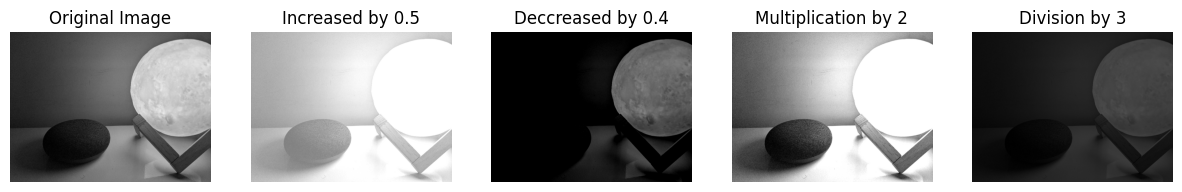

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(1, 5, 1)
plt.imshow(I_gray, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(I_add, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Increased by 0.5')

plt.subplot(1,5, 3)
plt.imshow(I_sub, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Deccreased by 0.4')

plt.subplot(1, 5, 4)
plt.imshow(I_mul, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Multiplication by 2')

plt.subplot(1, 5, 5)
plt.imshow(I_div, cmap = 'gray', vmin = 0, vmax = 1);
plt.axis("off")
plt.title('Division by 3');

# Problem 2

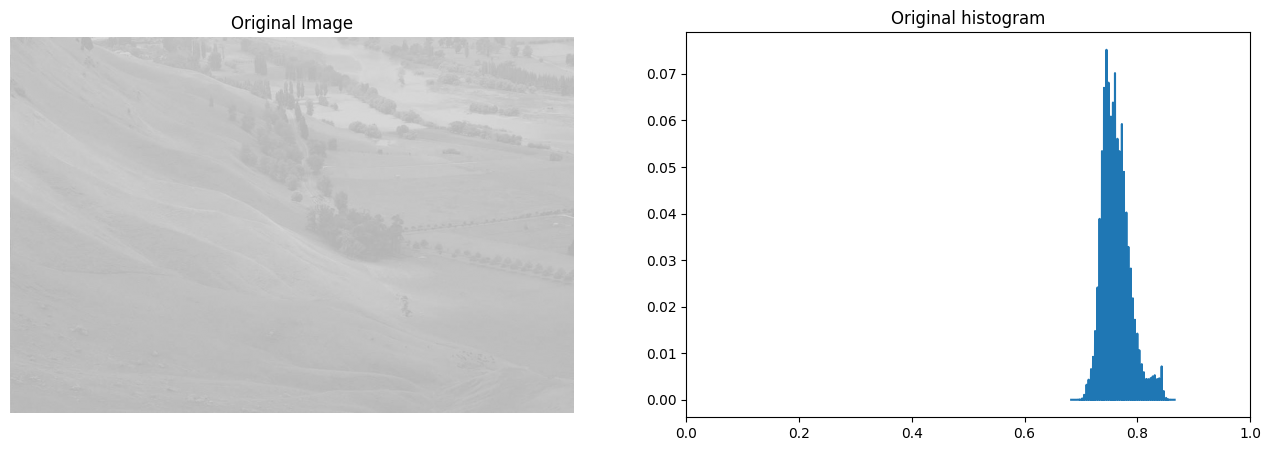

In [10]:
# import the "land.jpeg" image
I = io.imread("/content/land.jpeg")

# normalize the image
I_norm = img_as_float(I)

# calculate the PDF of the original image
hist_org, nbins_org = exposure.histogram(I_norm, nbins=256, normalize=True)


plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.imshow(I_norm, vmin = 0, vmax = 1, cmap = 'gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(nbins_org,hist_org)
plt.title('Original histogram')
plt.xlim(0, 1);

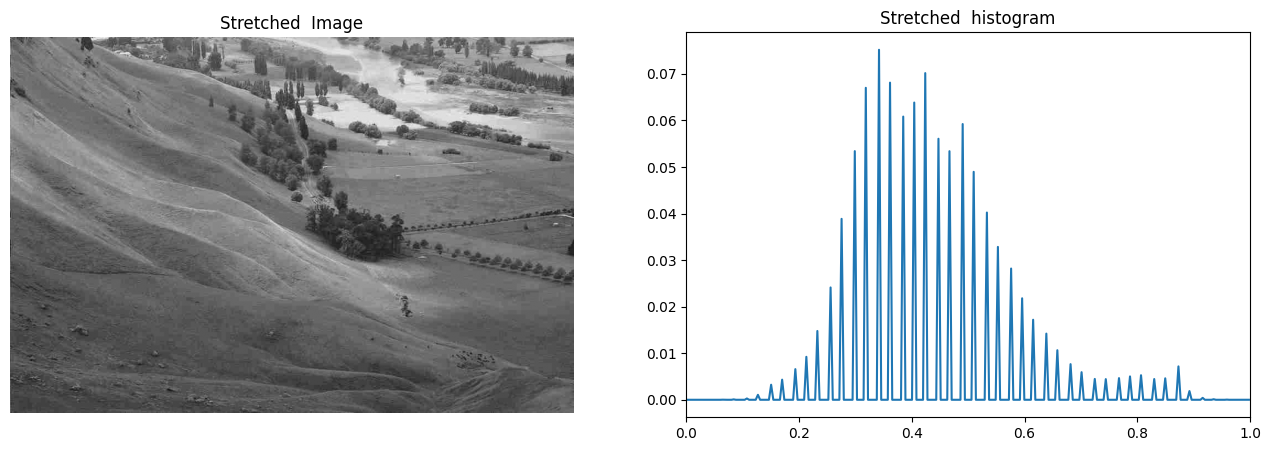

In [11]:
# contrast stretch the image, I_norm, to improve the image quality
# you can get c_min and c_max using I.min() and I.max() as it has been clipped accordingly
# get minimum and maximum intensity values
c_min = I_norm.min()
c_max = I_norm.max()
I_stretched = (I_norm - c_min) / (c_max - c_min)

# calculate the PDF of the stretched image
hist_str, nbins_str = exposure.histogram(I_stretched, nbins=256, normalize=True)


plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.imshow(I_stretched, vmin = 0, vmax = 1, cmap = 'gray')
plt.axis("off")
plt.title('Stretched  Image')


plt.subplot(1, 2, 2)
plt.plot(nbins_str,hist_str)
plt.title('Stretched  histogram')
plt.xlim(0, 1);

# Problem 3

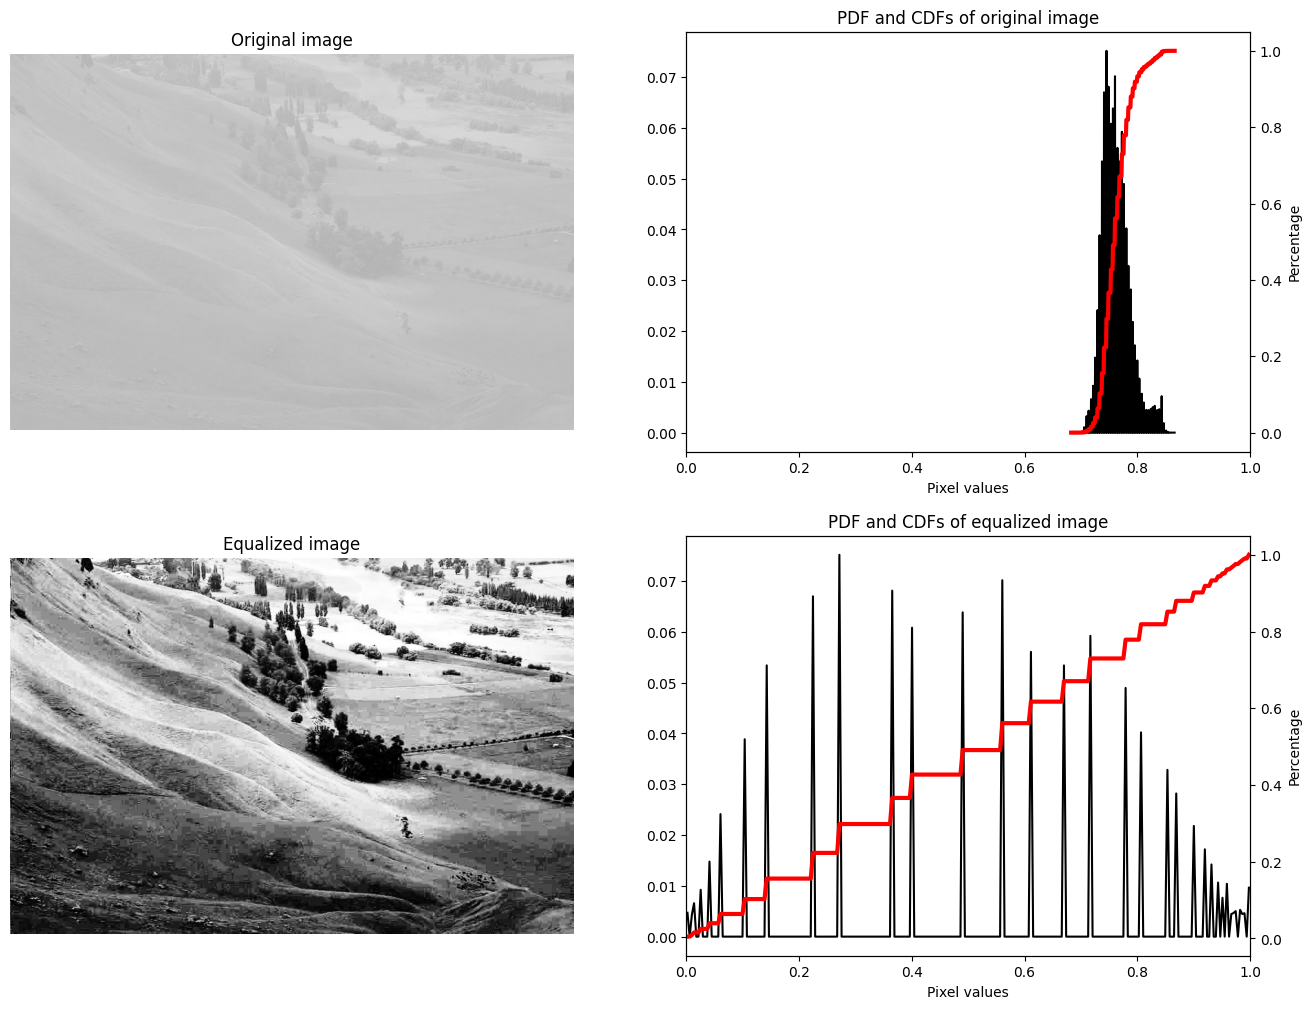

In [12]:
# for the "land.jpeg" image stored in I_norm, calculate the CDF
chist, cbins = exposure.cumulative_distribution(I_norm, nbins=256)

# perform global histogram equalization on the image I_norm
I_histeq = exposure.equalize_hist(I_norm)

# calculate the PDF of the equalized image
hist_I_histeq, bins_I_histeq = exposure.histogram(I_histeq, nbins=256, normalize=True)

# calculate the CDF of the equalized image
chist_I_histeq, cbins_I_histeq = exposure.cumulative_distribution(I_histeq, nbins=256)


plt.figure(figsize=(16,12))
plt.subplot(2, 2, 1)
plt.imshow(I_norm, vmin = 0, vmax = 1, cmap = 'gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(2, 2, 2)
plt.plot(nbins_org, hist_org, 'k')
plt.xlabel("Pixel values")
plt.xlim(0, 1)

plt.twinx()
plt.plot(cbins, chist, 'r', lw=3)
plt.ylabel("Percentage")
plt.title("PDF and CDFs of original image")
plt.xlim(0, 1)

plt.subplot(2, 2, 3)
plt.imshow(I_histeq, vmin = 0, vmax = 1, cmap = 'gray')
plt.axis("off")
plt.title("Equalized image")

plt.subplot(2, 2, 4)
plt.plot(bins_I_histeq, hist_I_histeq, 'k')
plt.xlabel("Pixel values")

plt.twinx()
plt.plot(cbins_I_histeq, chist_I_histeq, 'r', lw=3)
plt.ylabel("Percentage")
plt.title("PDF and CDFs of equalized image")
plt.xlim(0, 1);